In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#changing passendger id as index column
df=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:>

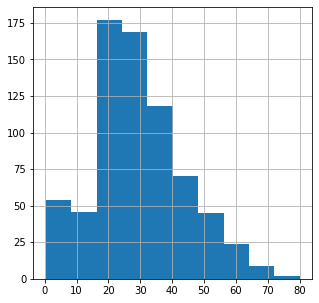

In [7]:
# null values are present in Age,Cabin and Embarked fields
# Handling null values in Age field

df['Age'].hist(figsize=(5,5))

In [8]:
#As it is right skewed, can fill the missing value with median

df['Age']= df['Age'].fillna(df['Age'].median())
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
#Since majority (687 records) are having nulls out of 891, we can drop the particular column
df.drop('Cabin',axis=1,inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [10]:
#As there is only 2 records are having null values in Embarked column, it wont affect much our dataset. so we can drop those
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Handling outliers

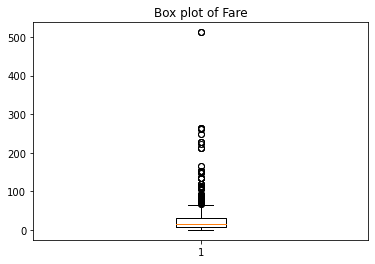

In [11]:
plt.boxplot(df['Fare'])
plt.title('Box plot of Fare')
plt.show()

In [12]:
#handling outliers using IQR
Q1=np.percentile(df['Fare'],25)
Q2=np.percentile(df['Fare'],50)
Q3=np.percentile(df['Fare'],75)
IQR = Q3-Q1
UL= Q3+IQR * 1.5
LL= Q1-IQR * 1.5
print('LL:', LL)
print('UL:', UL)

LL: -26.7605
UL: 65.6563


In [13]:
outliers = []
for i in df['Fare']:
    if (i>UL) or (i<LL):
        outliers.append(i)
    

In [14]:
outliers

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042

In [15]:
# all outliers are greater than Upper limit
ind = df['Fare']>UL
df.drop(df.loc[ind].index,inplace=True)

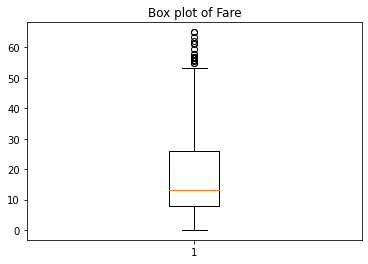

In [16]:
#replotting the boxplot again for Fare
plt.boxplot(df['Fare'])
plt.title('Box plot of Fare')
plt.show()

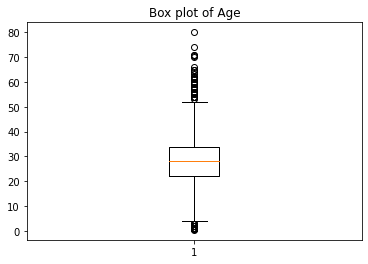

In [17]:
#Handling outliers in Age 
plt.boxplot(df['Age'])
plt.title('Box plot of Age')
plt.show()

In [18]:
#handling outliers using IQR
Q1=np.percentile(df['Age'],25)
Q2=np.percentile(df['Age'],50)
Q3=np.percentile(df['Age'],75)
IQR = Q3-Q1
UL= Q3+IQR * 1.5
LL= Q1-IQR * 1.5
print('LL:', LL)
print('UL:', UL)

LL: 4.0
UL: 52.0


In [19]:
outliers = []
for i in df['Age']:
    if (i>UL) or (i<LL):
        outliers.append(i)

In [20]:
outliers

[54.0,
 2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 3.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 3.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 3.0,
 1.0,
 1.0,
 3.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 70.0,
 60.0,
 60.0,
 0.67,
 57.0,
 54.0,
 1.0,
 0.42,
 2.0,
 1.0,
 0.83,
 74.0]

In [21]:
ind = df['Age']>UL
df.drop(df.loc[ind].index,inplace=True)

In [22]:
ind1 = df['Age']<LL
df.drop(df.loc[ind1].index,inplace=True)

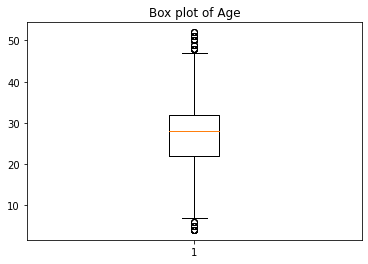

In [23]:
#replotting the box plot again
plt.boxplot(df['Age'])
plt.title('Box plot of Age')
plt.show()

In [24]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

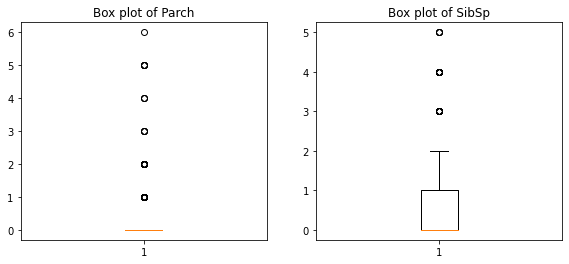

In [25]:
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.boxplot(df['Parch'])
plt.title('Box plot of Parch')
plt.subplot(132)
plt.boxplot(df['SibSp'])
plt.title('Box plot of SibSp')
plt.show()

There are outliers in both the fields but the values of outliers are realistic and hence can keep as it is

In [26]:
#df['Name'].nunique()
#dropping name columns as it wont help in model
df.drop('Name',axis=1,inplace=True)

In [27]:
#df['Ticket'].nunique()
#dropping the column ticket as it doesnot contribute to the model
df.drop('Ticket',axis=1,inplace=True)

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,28.0,0,0,8.4583,Q


In [31]:
df['Sex'].value_counts()

male      482
female    226
Name: Sex, dtype: int64

In [32]:
df['Embarked'].value_counts()

S    534
C    103
Q     71
Name: Embarked, dtype: int64

In [33]:
#importing the label encoder
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['Sex'] = en.fit_transform(df['Sex'])

In [34]:

df['Embarked'] = en.fit_transform(df['Embarked'])

In [36]:
df['Embarked'].value_counts()

2    534
0    103
1     71
Name: Embarked, dtype: int64

In [37]:
df['Sex'].value_counts()

1    482
0    226
Name: Sex, dtype: int64

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2
6,0,3,1,28.0,0,0,8.4583,1


### Modelling

In [44]:
#splitting the dataset into X and y
X=df.drop('Survived',axis=1)
y=df['Survived']

In [45]:
#importing train_test_split and creating train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [46]:
#creating the empty list to display the accuracy and f1 score after running all models
models=['RandomForest','LogisticRegression','DecisionTree','SVC','KNN','BernoulliNB']
model_test_acc=[]
model_test_f1_score = []
model_test_precision_score =[]
model_test_recall_score =[]

In [47]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred),3)
test_f1 =  np.round(f1_score(y_test,y_pred,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
#model_test_precision_score(test_prec)
#model_test_recall_score(test_recall)

print("F1 Score on test data using RandomForest tree: ",test_f1)
print("Accuracy Score on test data using RandomForest tree: ",test_acc)
#print("Recall score on  test data using RandomForest tree: ",test_prec)
#print("Precision score on test data using RandomForest tree: ",test_recall)

F1 Score on test data using RandomForest tree:  0.817
Accuracy Score on test data using RandomForest tree:  0.824


In [48]:
test_prec = np.round(recall_score(y_test, y_pred,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred,average='weighted'),3)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)
print("Recall score on  test data using RandomForest tree: ",test_prec)
print("Precision score on test data using RandomForest tree: ",test_recall)

Recall score on  test data using RandomForest tree:  0.824
Precision score on test data using RandomForest tree:  0.823


In [53]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred1),3)
test_f1 =  np.round(f1_score(y_test,y_pred1,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred1,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred1,average='weighted'),3)

model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)


print("F1 Score on test data using LogisticRegression: ",test_f1)
print("Accuracy Score on test data using LogisticRegression: ",test_acc)
print("Recall score on  test data using LogisticRegression : ",test_prec)
print("Precision score on test data using LogisticRegression : ",test_recall)

F1 Score on test data using LogisticRegression:  0.817
Accuracy Score on test data using LogisticRegression:  0.817
Recall score on  test data using LogisticRegression :  0.817
Precision score on test data using LogisticRegression :  0.817


In [54]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred2 = tree.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred2),3)
test_f1 =  np.round(f1_score(y_test,y_pred2,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred2,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred2,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)

print("F1 Score on test data using DecisionTree: ",test_f1)
print("Accuracy Score on test data using DecisionTree: ",test_acc)
print("Recall score on  test data using DecisionTree : ",test_prec)
print("Precision score on test data using DecisionTree : ",test_recall)

F1 Score on test data using DecisionTree:  0.832
Accuracy Score on test data using DecisionTree:  0.838
Recall score on  test data using DecisionTree :  0.838
Precision score on test data using DecisionTree :  0.838


In [55]:
svm= SVC()
svm.fit(X_train,y_train)
y_pred3 = svm.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred3),3)
test_f1 =  np.round(f1_score(y_test,y_pred3,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred3,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred3,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)

print("F1 Score on test data using SVM: ",test_f1)
print("Accuracy Score on test data using SVM: ",test_acc)
print("Recall score on  test data using SVM : ",test_prec)
print("Precision score on test data using SVM : ",test_recall)

F1 Score on test data using SVM:  0.637
Accuracy Score on test data using SVM:  0.711
Recall score on  test data using SVM :  0.711
Precision score on test data using SVM :  0.763


In [56]:
accuracy = []
neighbors = np.arange(1,12)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred4 = classifier.predict(X_test)
    acc = accuracy_score(y_pred4,y_test)
    accuracy.append(acc)

In [57]:
accuracy

[0.7253521126760564,
 0.7183098591549296,
 0.7394366197183099,
 0.6971830985915493,
 0.7605633802816901,
 0.704225352112676,
 0.7605633802816901,
 0.7253521126760564,
 0.7253521126760564,
 0.7183098591549296,
 0.7323943661971831]

<AxesSubplot:>

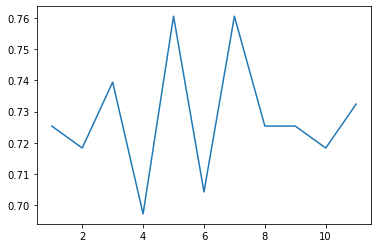

In [58]:
sns.lineplot(x=neighbors,y=accuracy)

In [59]:
#Since accuracy score is good for 5, we can select 5 as k

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred5 = classifier.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred5),3)
test_f1 =  np.round(f1_score(y_test,y_pred5,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred5,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred5,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)

print("F1 Score on test data using KNN: ",test_f1)
print("Accuracy Score on test data using KNN: ",test_acc)
print("Recall score on  test data using SVM : ",test_prec)
print("Precision score on test data using SVM : ",test_recall)

F1 Score on test data using KNN:  0.746
Accuracy Score on test data using KNN:  0.761
Recall score on  test data using SVM :  0.761
Precision score on test data using SVM :  0.754


In [60]:
 # Applying Bernoulli Naive Bayes Classifier
    
from sklearn.naive_bayes import BernoulliNB
classifier= BernoulliNB()
classifier.fit(X_train, y_train)
y_predd= classifier.predict(X_test)

test_acc =  np.round(accuracy_score(y_test,y_predd),3)
test_f1 =  np.round(f1_score(y_test,y_predd,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_predd,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_predd,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)

print("F1 Score on test data using KNN: ",test_f1)
print("Accuracy Score on test data using KNN: ",test_acc)
print("Recall score on  test data using SVM : ",test_prec)
print("Precision score on test data using SVM : ",test_recall)


F1 Score on test data using KNN:  0.775
Accuracy Score on test data using KNN:  0.775
Recall score on  test data using SVM :  0.775
Precision score on test data using SVM :  0.775


In [61]:
#displaying the accuracy and f1 score of each models
model_performance = pd.DataFrame({
    'model':models,
    'f1_score':model_test_f1_score,
    'accuracy':model_test_acc,
    'Recall_score':model_test_precision_score,
    'Precision_score':model_test_recall_score,
})
model_performance

,model,f1_score,accuracy,Recall_score,Precision_score
0,RandomForest,0.817,0.824,0.824,0.823
1,LogisticRegression,0.817,0.817,0.817,0.817
2,DecisionTree,0.832,0.838,0.838,0.838
3,SVC,0.637,0.711,0.711,0.763
4,KNN,0.746,0.761,0.761,0.754
5,BernoulliNB,0.775,0.775,0.775,0.775


From the above , it is clear that Random forest,LogisticRegression and Decision tree model has got good scores , but among the three decision tree model has very good scores compared to others. So decision tree can be considered as good model